# Modul 9 Struktur Data: *Heap Tree*, AVL/*Balance Tree*

Kembali ke [Struktur Data (dengan Python)](strukdat2023.qmd)

In [2]:
import numpy as np
import graphviz as gv

## Implementasi *Heap Tree* dengan *array*

*Heap tree* adalah sejenis *binary tree* dengan beberapa sifat tambahan tertentu. *Heap tree* terbagi lagi menjadi dua jenis, yaitu *max heap* dan *min heap*.

* *Max heap* adalah *binary tree* dengan sifat tambahan berikut:
    - merupakan *tree* yang *complete* (terkadang disebut *almost complete*), yaitu tiap level (kecuali level terakhir) harus terisi penuh, sedangkan pengisian *node* di level terakhir harus dari paling kiri.
    - ***(Max Heap Property)*** Untuk tiap *node*, nilai data yang tersimpan di *node* tersebut harus **lebih besar** daripada (atau sama dengan) nilai data yang tersimpan di tiap *child* nya.

    Dengan demikian, pada *max heap*, data dengan nilai **terbesar** ada di *root*.

* *Min heap* adalah *binary tree* dengan sifat tambahan berikut:
    - merupakan *tree* yang *complete* (terkadang disebut *almost complete*)
    - ***(Min Heap Property)*** Untuk tiap *node*, nilai data yang tersimpan di *node* tersebut harus **lebih kecil** daripada (atau sama dengan) nilai data yang tersimpan di tiap *child* nya.

    Dengan demikian, pada *min heap*, data dengan nilai **terkecil** ada di *root*.

Beberapa hal lain tentang *heap tree*:
* Ketika membahas *deletion*, yang dihapus sudah pasti *root*, dan nilai yang dihapus juga di-`return` (seperti operasi `pop` di *stack*).
* *Insertion* selalu dilakukan di level paling dalam, tepat di sebelah kanan dari *node* yang sudah ada (agar *tree* tetap beersifat *complete*).

Selama berurusan dengan *heap tree*, ada (sekumpulan) operasi bernama *heapify*, yang tujuannya adalah memastikan bahwa *heap tree* memang memenuhi sifat *max/min heap property*. Beberapa variasi *heapify* adalah:
* *bottom-up*: dimulai dari suatu *leaf node* yang ditentukan, periksa dengan parentnya. Kemudian, periksa parent tersebut dengan parent dari parent tersebut. Terus ke atas hingga mencapai *root*.
* *top-down*: dimulai dari *root*,
    - untuk *max heap*: periksa dengan yang **terbesar** di antara semua *child* nya. Kemudian, periksa *child* tersebut dengan yang **terbesar** di antara semua *child* nya. Terus ke bawah, berhenti ketika sudah mencapai suatu *leaf node*.
    - untuk *min heap*: periksa dengan yang **terkecil** di antara semua *child* nya. Kemudian, periksa *child* tersebut dengan yang **terkecil** di antara semua *child* nya. Terus ke bawah, berhenti ketika sudah mencapai suatu *leaf node*.
* *heapify all*: periksa tiap *node* dengan parentnya, dimulai dari level terdalam, dimulai dari *node* paling kanan. Lanjut ke tiap *node* yang ada di sebelah kirinya, hingga level tersebut sudah diperiksa semua. Kemudian, lanjut ke level di atasnya, dimulai dari *node* yang paling kanan. Lanjut terus hingga mencapai *root*.

Pada *heap tree*, operasi *insertion* selalu diikuti dengan *heapify* yang *bottom-up*, dan operasi *deletion* selalu diikuti dengan *heapify* yang *top-down*.

Apabila diberikan sembarang *binary tree*, di antara ketiga variasi di atas, hanya *heapify all* yang menjamin *binary tree* berubah menjadi *heap tree*. Namun, apabila diberikan sembarang *heap tree*, operasi *insertion* dan *deletion* yang dilakukan (masing-masing diikuti *heapify* yang *bottom-up* atau *top-down*) akan tetap menjaga sifatnya sebagai *heap tree*, meskipun tidak dilakukan *heapify all* sama sekali.

Kalau ingin mengubah sembarang *binary tree* menjadi *heap tree*, kami menyediakan *method* bernama `completify` untuk membuat *binary tree* tersebut menjadi *complete*, yang kemudian bisa diikuti dengan penggunaan *heapify all*.

Kita akan mengimplementasikan *heap tree* dengan *array*. Karena *heap tree* adalah sejenis *binary tree*, kita bisa membuat `class ArrayMaxHeap` dan `class ArrayMinHeap` yang sama-sama meng-*inherit* dari `class ArrayBintree` dari [Modul 8](./Strukdat2023_Modul08.ipynb), yaitu:

In [20]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = int(np.floor( (node_idx - 1)/2 ))
        return idx

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

### Implementasi *Max Heap*

In [140]:
class ArrayMaxHeap(ArrayBintree):
    def __init__(self, dtype, height, emptydata=-9999):
        # menggunakan __init__ dari ArrayBintree,
        # melalui super() yaitu parent class
        super().__init__(dtype, height, emptydata)

        # atribut tambahan: banyaknya node yang sudah ada
        self.n_nodes = 0
    
    # semua method dari ArrayBintree otomatis sudah terdefinisi

    # Membuat binary tree menjadi complete (atau almost complete)
    # Idenya, tiap elemen yang bukan "data kosong" harus didempetkan ke kiri
    def completify(self):
        # Sangat mirip dengan insertion sort, hanya saja syaratnya yang beda
        for i in range(self.array_size): # i = 0, 1, 2, ..., n-1
            for j in range(i, 0, -1): # j = i, i-1, ..., 2, 1
                if ((self.array[j] != self.emptydata)
                    and (self.array[j-1] == self.emptydata)):
                    self.array[j-1] = self.array[j]
                    self.array[j] = self.emptydata
        # Setelah selesai, tentukan nilai n_nodes
        i = 0
        while (i < self.array_size) and (self.array[i] != self.emptydata):
            i += 1
        self.n_nodes = i

    # Pastikan, dari leaf tertentu ke atas, bahwa max heap memang memenuhi
    # max heap property
    def heapify_bottomup(self, child_idx):
        if child_idx > 0:
            parent_idx = self.get_parent_idx(child_idx)
            if not (self.array[parent_idx] >= self.array[child_idx]):
                # Jika tidak memenuhi max heap property, tukar
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp
            # heapify parent nya
            self.heapify_bottomup(parent_idx)

    def insert(self, newdata):
        if self.n_nodes == self.array_size:
            print("Error insert: array max heap sudah penuh")
        else:
            self.array[self.n_nodes] = newdata
            self.heapify_bottomup(self.n_nodes)
            self.n_nodes += 1
    
    # Pastikan, dari atas ke bawah, bahwa max heap memang memenuhi
    # max heap property
    def heapify_topdown(self, parent_idx=None):
        # Awalnya mulai dari root
        if parent_idx == None:
            parent_idx = 0
        
        # Menentukan yang mana antara left child atau right child yang
        # lebih besar
        left_idx = self.get_left_child_idx(parent_idx)
        right_idx = self.get_right_child_idx(parent_idx)

        if (left_idx != -1) and (right_idx != -1):
            # Kasus dua child, yang mana yang lebih besar?
            if (self.array[left_idx] > self.array[right_idx]):
                greater_idx = left_idx
            else:
                greater_idx = right_idx
        elif (left_idx != -1): # Hanya satu child yaitu yang kiri, pilih saja
            greater_idx = left_idx
        elif (right_idx != -1): # Hanya satu child yaitu yang kanan, pilih saja
            greater_idx = right_idx
        else: # tidak punya child; top down selesai
            return

        # Kalau child terbesar itu lebih besar daripada parent, tukar
        # agar max heap property menjadi terpenuhi
        if self.array[greater_idx] > self.array[parent_idx]:
            temp = self.array[greater_idx]
            self.array[greater_idx] = self.array[parent_idx]
            self.array[parent_idx] = temp
        
        # Lanjutkan heapify pada child tersebut
        self.heapify_topdown(greater_idx)
    
    # Mengintip apa yang ada di root
    def peek(self):
        nilai = self.get_root()
        if nilai == self.emptydata:
            print("Error peek: max heap sedang kosong")
            return None
        else:
            return nilai

    # Delete root
    def delete(self):
        # 1. Peroleh nilai root untuk di-return
        nilai_root = self.get_root()

        # Kalau ternyata sudah kosong sebelumnya, tidak ada yang bisa dihapus
        if nilai_root == self.emptydata:
            print("Error delete: max heap sudah kosong sebelumnya")
            return None
        # Kalau tidak kosong, lanjut

        # 2. Ganti nilai di root dengan elemen ter-kanan di array
        self.set_root(self.array[self.n_nodes-1])

        # 3. "Hapus" elemen ter-kanan tersebut
        self.array[self.n_nodes-1] = self.emptydata
        self.n_nodes -= 1

        # 4. Lakukan heapify dari root ke bawah
        self.heapify_topdown()

        # 5. return nilai yang baru saja dihapus
        return nilai_root

    # Heapify untuk semua node
    def heapify_all(self):
        # Periksa dari node ter-kanan hingga node ter-kiri (kecuali root)
        for child_idx in range(self.n_nodes, 0, -1): # i = n, n-1, ..., 2, 1
            parent_idx = self.get_parent_idx(child_idx)
            # Jika max heap property tidak terpenuhi, tukar
            if not (self.array[parent_idx] >= self.array[child_idx]):
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp

Mengubah suatu *binary tree* (representasi *array*) menjadi *heap tree*

In [141]:
bintree1 = ArrayMaxHeap(int, 3)

In [142]:
list1 = [15, 22, 14, 75, -9999, 67, -9999, 32]
for i in range(len(list1)):
    bintree1.array[i] = list1[i]

In [143]:
print(bintree1.array)

[   15    22    14    75 -9999    67 -9999    32 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


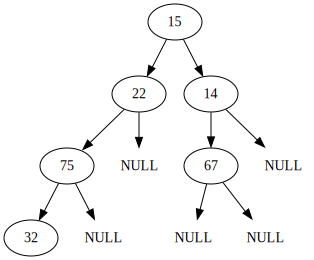

In [144]:
display(bintree1.get_digraph_simple())

In [145]:
bintree1.completify()

In [146]:
print(bintree1.array)

[   15    22    14    75    67    32 -9999 -9999 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


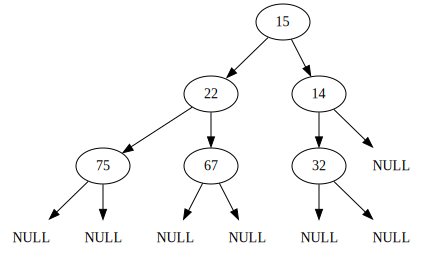

In [147]:
display(bintree1.get_digraph_simple())

In [148]:
bintree1.array[4]

67

In [149]:
bintree1.heapify_bottomup(4)

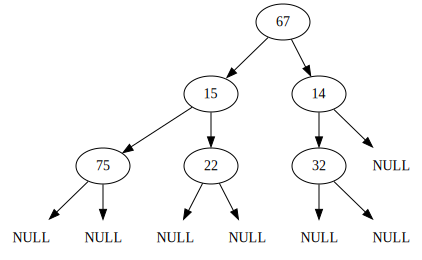

In [150]:
display(bintree1.get_digraph_simple())

In [151]:
bintree1.heapify_topdown()

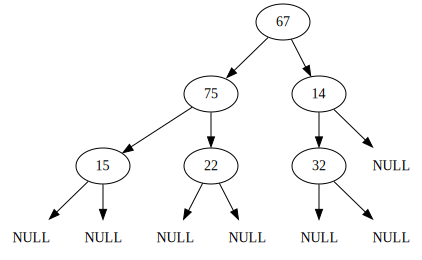

In [152]:
display(bintree1.get_digraph_simple())

In [153]:
print(bintree1.array)

[   67    75    14    15    22    32 -9999 -9999 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


In [154]:
bintree1.array[5]

32

In [155]:
bintree1.heapify_bottomup(5)

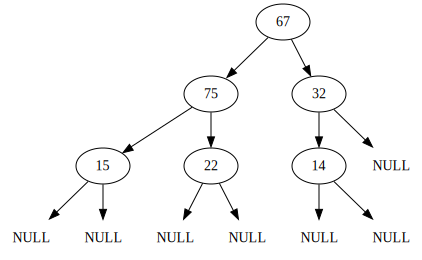

In [156]:
display(bintree1.get_digraph_simple())

In [157]:
bintree1.heapify_all()

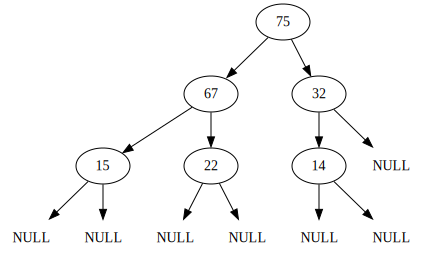

In [158]:
display(bintree1.get_digraph_simple())

Membangun *max heap* baru dari awal

In [51]:
arraymaxheap = ArrayMaxHeap(int, 4)

In [52]:
arraymaxheap.insert(50)

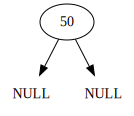

In [53]:
display(arraymaxheap.get_digraph_simple())

In [54]:
arraymaxheap.insert(40)

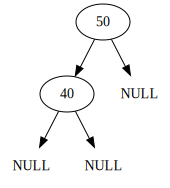

In [55]:
display(arraymaxheap.get_digraph_simple())

In [56]:
arraymaxheap.insert(70)

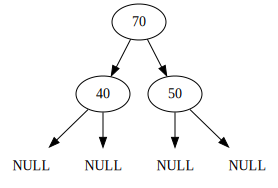

In [57]:
display(arraymaxheap.get_digraph_simple())

In [58]:
arraymaxheap.insert(45)

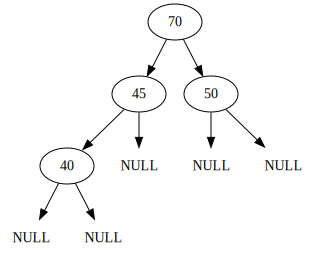

In [59]:
display(arraymaxheap.get_digraph_simple())

### Implementasi *Min Heap*

### *Heapify*: mengubah *binary tree* menjadi *heap tree*

## Implementasi AVL/*Balance Tree* dengan *pointer* (*linked* AVL *tree*)